<a href="https://www.kaggle.com/code/janeshnanda12/traffic-light?scriptVersionId=224340948" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/german-traffic-sign-dataset/test.p
/kaggle/input/german-traffic-sign-dataset/train.p
/kaggle/input/german-traffic-sign-dataset/signname.csv
/kaggle/input/german-traffic-sign-dataset/valid.p


In [17]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.callbacks import Callback

# German Traffic Sign Dataset - Combined Data

This repository contains code for combining the training and validation datasets of the German Traffic Sign Dataset into a single file.

## Overview

The **German Traffic Sign Dataset** is a collection of traffic sign images used for training and testing machine learning models for traffic sign recognition. This code combines the two pickle files — one for training (`train.p`) and one for validation (`valid.p`) — into a single file (`final.p`) for easier access and further processing.

## Code Explanation

The code below performs the following actions:
1. Loads the training and validation dataset pickle files (`train.p` and `valid.p`).
2. Merges the datasets into a single list.
3. Saves the combined data into a new pickle file called `final.p`.



In [18]:
combined = ['/kaggle/input/german-traffic-sign-dataset/train.p', '/kaggle/input/german-traffic-sign-dataset/valid.p']
con = []

#combine the data from the train and valid dataset
for f in combined:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        if isinstance(data, list):
            con.extend(data)
        else:
            con.append(data)


#opening the final pickle file
with open("final.p", 'wb') as final:
    pickle.dump(con, final)

# EarlyStopping Callback 
The **EarlyStopping** callback is a technique used to stop training when a model's performance (on a validation set) stops improving. It helps prevent overfitting by halting training once the model's performance plateaus.


In [19]:
#EarlyStopping Function to stop training id the accuarcy is greatyer than 0.9980

class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.9980:
            self.model.stop_training = True
            print("\nReached 99.90% accuracy so cancelling training!")

In [20]:
with open("/kaggle/working/final.p",'rb') as file:
    train_data = pickle.load(file)

#splitting x and y train
X_train,y_train = train_data[0]['features'],train_data[0]['labels']
y_train[25012]

7

# Convolutional Neural Network for Image Classification

This document explains the process of defining and training a Convolutional Neural Network (CNN) for image classification tasks. Specifically, this implementation is intended for classifying traffic sign images with 43 classes.



In [21]:
#Loading the pickle file

with open("/kaggle/working/final.p",'rb') as file:
    train_data = pickle.load(file)

#splitting x and y train
X_train,y_train = train_data[0]['features'],train_data[0]['labels']


#normalization
X_train = X_train.astype('float32')/255.0


#defining the cnn network architecture wuth varioyus layer and results out the model
def network():

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(128,(3,3),activation="relu",input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation="relu"),
        tf.keras.layers.Dense(120,activation="relu"),
        tf.keras.layers.Dense(43,activation="softmax")
    ])

    model.compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ['accuracy']
    )

    return model


model = network()
history = model.fit(X_train,y_train,epochs=50,batch_size=16,callbacks=[EarlyStoppingCallback()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5664 - loss: 1.5385
Epoch 2/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9709 - loss: 0.1052
Epoch 3/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9830 - loss: 0.0585
Epoch 4/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9883 - loss: 0.0423
Epoch 5/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9914 - loss: 0.0286
Epoch 6/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9911 - loss: 0.0279
Epoch 7/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9914 - loss: 0.0274
Epoch 8/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9919 - loss: 0.0278
Epoch 9/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9954 - loss: 0.0171
Epoch 10/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9949 - loss: 0.0188
Epoch 11/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9959 - loss: 0.0149
Epoch 12/50
2175/2175 ━━━━━━━

In [22]:
#summary of the model

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 120)                 │          61,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 43)                  │           5,203 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,972,899 (15.16 MB)

 Trainable params: 1,324,299 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,648,600 (10.10 MB)

In [23]:
#sace the model

model.save("traffic-sign.h5")

In [24]:
#Loading the pickle file

with open('/kaggle/input/german-traffic-sign-dataset/test.p', 'rb') as f:
    test_data = pickle.load(f)

#splitting x and y test

X_test, y_test = test_data['features'], test_data['labels']

#normalization

X_test = X_test.astype('float32') / 255.0

In [25]:
#loss and accuracy of the model

loss,accuracy = model.evaluate(X_test,y_test)
print(loss)
print(accuracy)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9453 - loss: 1.2527
1.3314626216888428
0.9438638091087341



# The different plots for loss and accuarcy of the model:
The representation will be in the form of a subplot,heatmap and as a lineplot.

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9975 - loss: 0.0166
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9453 - loss: 1.2527


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass 

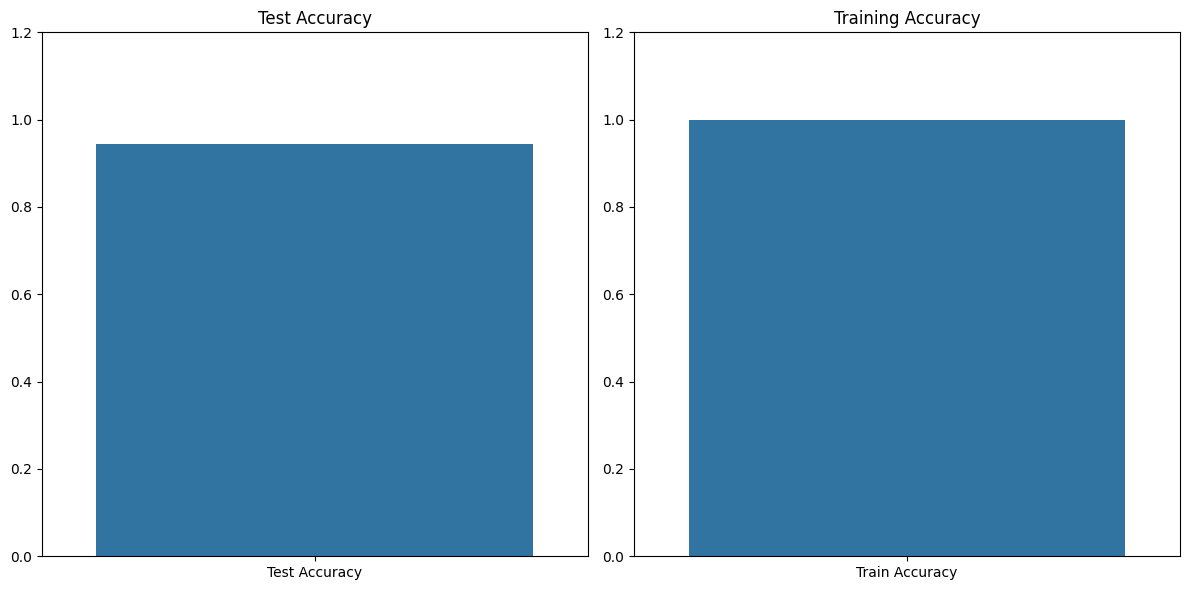

In [26]:
#subplots

train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss,test_acc = model.evaluate(X_test,y_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.barplot(x=["Test Accuracy"], y=[test_acc], ax=axes[0])
axes[0].set_title("Test Accuracy")
axes[0].set_ylim(0,1.2)


sns.barplot(x=["Train Accuracy"], y=[train_accuracy], ax=axes[1])
axes[1].set_title("Training Accuracy")
axes[1].set_ylim(0,1.2)


plt.tight_layout()


plt.show()

In [27]:
#predict

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
from sklearn.metrics import classification_report,confusion_matrix
conf = confusion_matrix(y_pred_classes,y_true_classes)
clas = classification_report(y_pred_classes,y_true_classes)

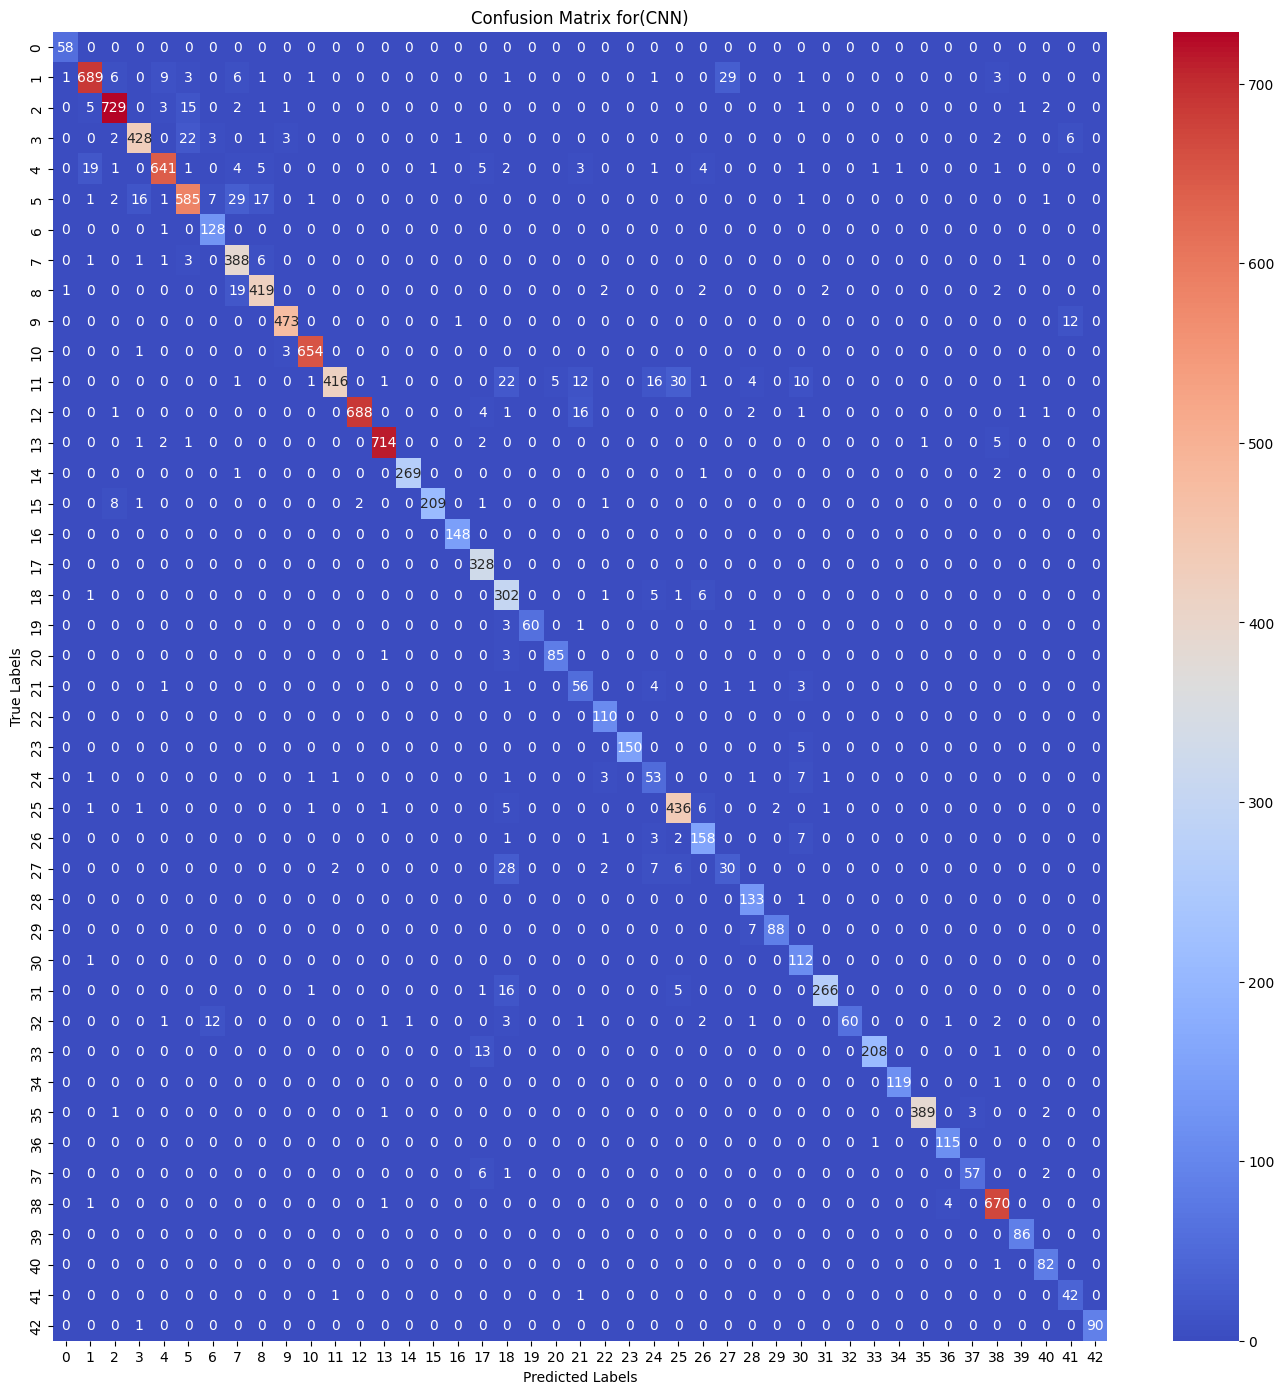

In [29]:
#Heatmap

plt.figure(figsize=(17, 17))
sns.heatmap(conf, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for(CNN)')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

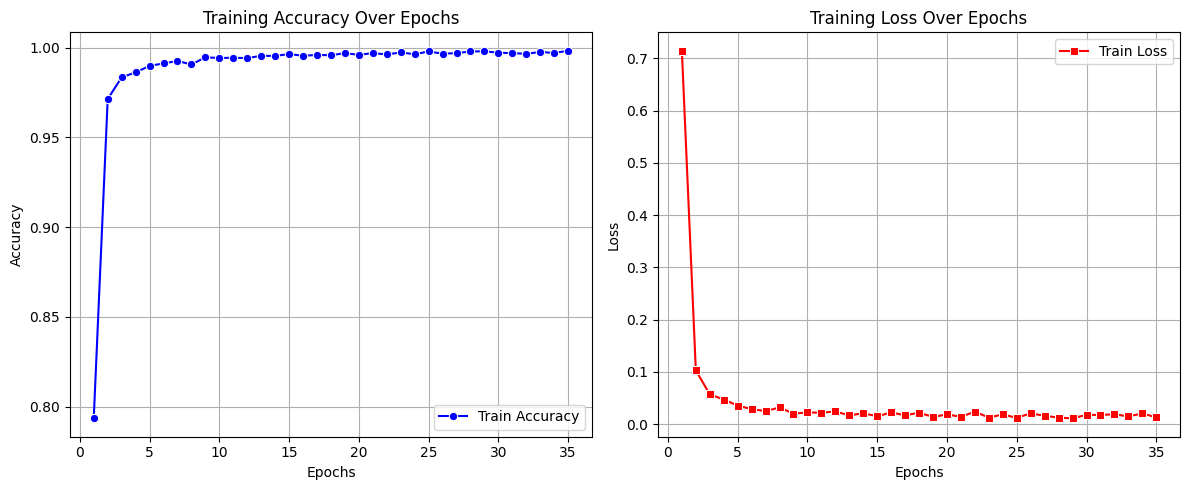

In [30]:
#line plot

import matplotlib.pyplot as plt
import seaborn as sns


epochs = range(1, len(history.history['accuracy']) + 1)  
train_acc = history.history['accuracy'] 
train_loss = history.history['loss']  


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.lineplot(x=epochs, y=train_acc, marker="o", ax=axes[0], color="blue", label="Train Accuracy")
axes[0].set_title("Training Accuracy Over Epochs")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)


sns.lineplot(x=epochs, y=train_loss, marker="s", ax=axes[1], color="red", label="Train Loss")
axes[1].set_title("Training Loss Over Epochs")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].grid(True)

plt.tight_layout()
plt.show()
